## Intermediate Machine Learning: Assignment 1

**Deadline**

Assignment 1 is due Wednesday, September 25 11:59 pm. Late work will not be accepted as per the course policies (see the syllabus on Canvas).

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Acknowledge any use of an AI system such as ChatGPT or Copilot.

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on Canvas. You can also post questions or start discussions on Ed Discussion. The assignment may look long at first glance, but the problems are broken up into steps that should help you to make steady progress.

**Submission**

Submit your assignment as a .pdf on Gradescope. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. Note: When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. This will allow graders to more easily find your complete solution to each problem.

To produce the .pdf, please do the following in order to preserve the cell structure of the notebook:

Go to "File" at the top-left of your Jupyter Notebook
Under "Download as", select "HTML (.html)"
After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
From the print window, select the option to save as a .pdf

**Topics**

 * Lasso
 * Bias-variance decomposition
 * Mercer kernels
 * LOOCV for kernel smoothing and ridge regression

This assignment will also help to solidify your Python and Jupyter notebook skills.


### Problem 1: Roping variables with the lasso (15 points)

In this exercise, we'll employ the lasso regression technique to identify key predictor variables from the diabetes dataset. This dataset has its origins in the National Institute of Diabetes and Digestive and Kidney Diseases. The primary goal is to predict, based on diagnostic measurements, whether or not a patient has diabetes.

To provide context, the dataset focuses on a very specific population: all female patients, aged 21 and above, of Pima Indian descent.

**Dataset Features**:

* **Pregnancies**: Number of times pregnant 
* **Glucose**: Plasma glucose concentration after 2 hours in an oral glucose tolerance test
* **BloodPressure**: Diastolic blood pressure (mm Hg)
* **SkinThickness**: Thickness of triceps skin fold (mm)
* **Insulin**: 2-hour serum insulin level (mu U/ml)
* **BMI**: Body mass index (calculated as weight in kg divided by height in m squared)
* **DiabetesPedigreeFunction**: A function that scores likelihood of diabetes based on family history
* **Age**: Age in years
* **Outcome**: The target variable, indicating presence (1) or absence (0) of diabetes

**Your tasks are as follows**:

1. **Plotting Lasso Paths**: Generate a visualization of the lasso regularization paths.
2. **Identifying Key Predictors**: Determine which coefficients of \( \beta \) are non-zero.
3. **Estimating Coefficients**: Provide the best estimate for these non-zero coefficients.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
%matplotlib inline

Just run the next cell to read in the data.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/YData123/sds365-fa23/main/assignments/assn1/diabetes.csv')
X = np.array(df.iloc[:,:8])
y = np.array(df.iloc[:,-1])
n, p = X.shape
print("Number of rows: {}".format(n))
print("Number of columns: {}".format(p))
print(df.head())

Number of rows: 768
Number of columns: 8
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### 1.1: Lasso regularization paths

Run the lasso and plot the regularization paths. You can use the `Lasso` class from the `sklearn.linear_model` package. Plot the parameter paths with the regularization level $\lambda$ (`alpha` in the code) on the log-scale, as done in the lasso demo code from class. (As always, be sure to label your axes.)

Show two plots, one where you run the lasso on the variables as given in the dataset, another where you standardize the variables to have mean zero and standard deviation one. Describe the differences in the regularization paths, and explain those differences.

When the predictors are standardized, what order do they appear in the lasso fits? That is, as $\lambda$ decreases from infinity to zero, what is the sequence of variables that enter the model with nonzero coefficients? Explain why this ordering may (or may not) make sense.



[ 9.06388384e-03  6.03724609e-03 -1.70822490e-03  8.70817599e-05
 -1.12687429e-04  1.18610535e-02  0.00000000e+00  3.55614198e-03]


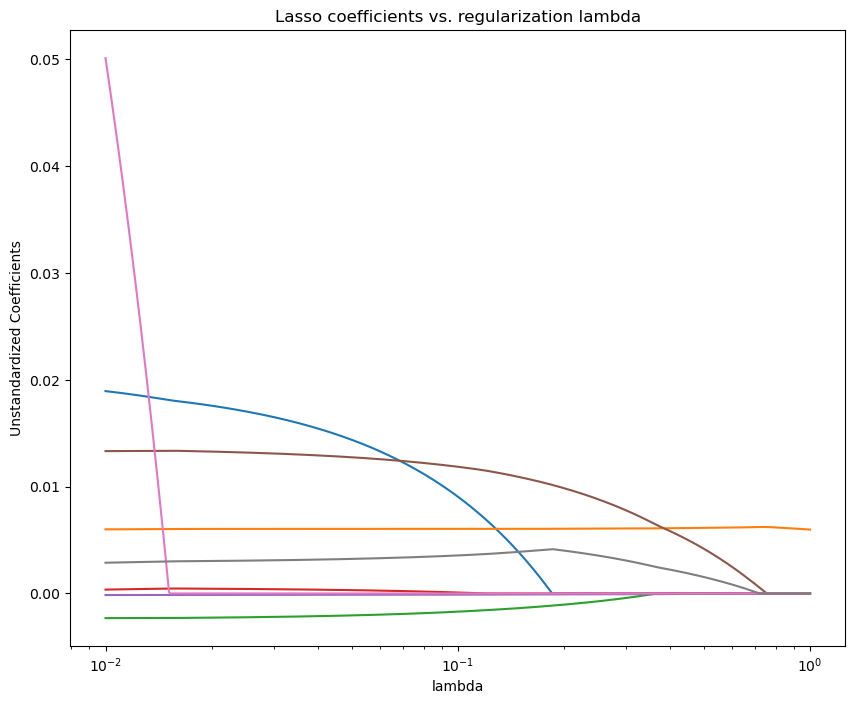

In [4]:
# your code and markdown here

#No standardization of variables
lasso = Lasso(alpha=.1)
lasso.fit(X, y)
print(lasso.coef_)

#plot
alphas = np.linspace(0.01,1,10000)
lasso = Lasso() 
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

plt.figure(figsize=(10,8))    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Unstandardized Coefficients')
plt.title('Lasso coefficients vs. regularization lambda');

[ 0.07413642  0.32731487 -0.          0.          0.          0.11669811
  0.01472821  0.00702466]


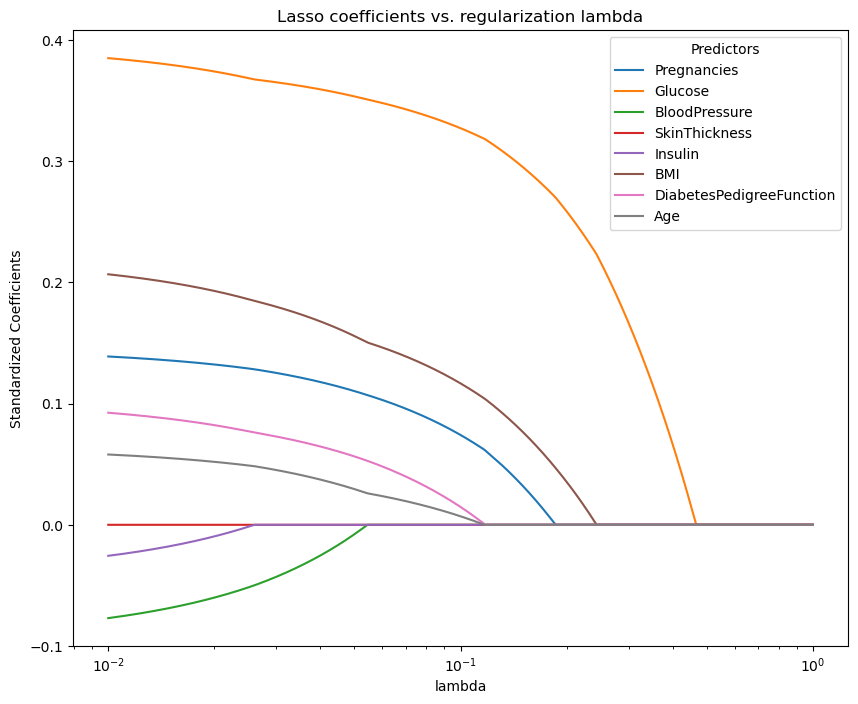

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Example list of feature names
feature_names = (df.iloc[:,:8]).columns

# Assume y and X are already defined
# Standardization of predictors
y = (y - np.mean(y)) / np.std(y)
Xs = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Fitting Lasso model
lasso = Lasso(alpha=.1)
lasso.fit(Xs, y)
print(lasso.coef_)

# Plotting Lasso coefficients vs. regularization parameter
alphas = np.linspace(0.01, 1, 10000)
lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xs, y)
    coefs.append(lasso.coef_)

coefs = np.array(coefs)

plt.figure(figsize=(10, 8))
ax = plt.gca()

# Plot each coefficient and store the line objects for the legend
lines = []
for i in range(coefs.shape[1]):
    line, = ax.plot(alphas, coefs[:, i], label=feature_names[i])  # Plot and get the line object
    lines.append(line)  # Store the line object

ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients vs. regularization lambda')

# Ensure the legend matches the correct colors and lines
plt.legend(handles=lines, loc='best', title='Predictors')
plt.show()


The regularization paths do not converge for the unstandardized predictors, but they converge for the standardized ones at zero. This is because standardization ensures that all predictors are on the same scale, allowing the Lasso penalty to be applied uniformly across all variables, thus enabling the regularization process to converge effectively.

The sequence of variables that enter the model with nonzero coefficients from high to low regularization is as follows:
1. Glucose
2. BMI
3. Pregnancies
4. Diabetes Pedigree Function
5. Age
6. Blood Pressure
7. Insulin
8. Skin thickness

This ordering makes sense as it lists the predictors in order of relevance. Glucose tolerance testing is the prime metric for determining diabetes, and skin thickness is irrelevant. High regularization reduces the most relevant predictors to zero while the least relevant predictors are reduced even at low regularization.

### 1.2: Select, estimate, and predict 

The true model is linear, and only a subset $S \subset \{0,1,\ldots, 49\}$ of the 50 variables have non-zero coefficients $\beta_j$. In this problem you should make three estimates: 

1. An estimate $\hat S$ of $S$
2. An estimate $\hat \beta_j$ for each $j\in \hat S$
3. An estimate of the predictive risk ${\mathbb E}(Y - X\hat\beta)^2$


We are not specifying how you should construct these estimates. You should use your judgement, taste, and 
the tools provided from class. However, you must clearly explain and justify whatever approach that you use.


In [83]:
from sklearn.model_selection import LeaveOneOut

alphas = np.logspace(-4, 0, 50)  
loocv = LeaveOneOut()
mean_mse = []

for alpha in alphas:
    mse_list = [] 
    
    #LOOCV
    for train_index, test_index in loocv.split(Xs):
        X_train, X_test = Xs[train_index], Xs[test_index]
        y_train, y_test = y[train_index], y[test_index]
        lasso = Lasso(alpha=alpha, max_iter=10000)
        lasso.fit(X_train, y_train)
        y_pred = lasso.predict(X_test)
        mse = (y_test - y_pred) ** 2
        mse_list.append(mse)
        
    mean_mse.append(np.mean(mse_list))

#Select the alpha with the lowest mean MSE
best_alpha = alphas[np.argmin(mean_mse)]
print(f"Best alpha: {best_alpha}")

#Fit the Lasso model on the entire dataset using the best alpha
lasso = Lasso(alpha=best_alpha, max_iter=10000)
lasso.fit(Xs, y)

coefs = lasso.coef_

hat_S = np.nonzero(coefs)[0]
print(f"Selected features (hat_S): {hat_S}")

hat_beta = coefs[hat_S]
print(f"Estimated coefficients (hat_beta_j): {hat_beta}")

#Use minimum mean MSE from LOOCV
estimated_predictive_risk = np.min(mean_mse)
print(f"Estimated predictive risk: {estimated_predictive_risk}")

Best alpha: 0.004291934260128779
Selected features (hat_S): [0 1 2 4 5 6 7]
Estimated coefficients (hat_beta_j): [ 0.14267564  0.39141753 -0.08667757 -0.03472465  0.21458724  0.09833901
  0.06147587]
Estimated predictive risk: 0.7141467592877313


### Problem 2: Risky business (10 points)

In class [(and in these notes)](https://github.com/YData123/sds365-fa22/raw/main/notes/kernel-bias-variance.pdf) we sketched a proof that, when the regression function has two bounded derivatives,
 the bias and variance for kernel smoothing scale as

$$ \mbox{bias}^2 = O\left(h^4\right)$$
$$ \mbox{var} = O\left(\frac{1}{nh^p}\right).$$

Here $h$ is the bandwidth parameter, $n$ is the sample size, and $p$ is the number of predictor variables. These expressions are asymptotic, meaning that they apply as $n$ gets large and $h$ gets small.  In this problem your job is to reason about the implications of this bias-variance decomposition for prediction.

*Note:* For this problem, you may either enter your answers in Markdown using $\rm\LaTeX$, or you write them on paper and scan to insert as an image in the notebook; whichever you prefer.


### 2.1 Selecting the optimal bandwidth

Suppose that the bias and variance are such that 

$$ \mbox{bias}^2(\hat m(x))  \leq c_1 h^4 $$
$$ \mbox{var}(\hat m(x)) \leq c_2 \frac{1}{nh^p}.$$

for two constants $c_1$ and $c_2$. Using these expressions and a little calculus, determine the optimal bandwidth $h$ to minimize the risk function 

$$R(h) = {\mathbb E}\left(\hat m(x) - m(x)\right)^2.$$

Your answer should involve the constants $c_1, c_2$, and $n$ and $p$. Give a bound on the resulting risk using this bandwidth.


### 2.2 Bandwith selection without tears

Now, going back to the expressions $\mbox{bias}^2 = O\left(h^4\right)$ and $ \mbox{var} = O\left(\displaystyle\frac{1}{nh^p}\right)$, explain why the scaling of the optimal bandwidth (as a function of $n$ and $p$), must satisfy 
$\mbox{bias}^2  \approx \mbox{var}$; that is, they must be of the same order as $h\to 0$. Then, without using any calculus, use this argument to determine the optimal scaling of the bandwidth and the fastest rate at which the 
risk $R(h) = {\mathbb E}\left(\hat m(x) - m(x)\right)^2$ can approach zero as the sample size increases.


### 2.3 The cursed COD

Using the risk bound you derive above, make a plot that demonstrates the curse of dimensionality by plotting the sample size required to achieve a given level of risk. Specifically, let the target risk $R$ vary between 0.1 and 0.5, and let the dimension $p$ vary between 1 and 20, and plot the sample size required to achieve that risk. Give a single plot that shows the collection of curves for each dimension.




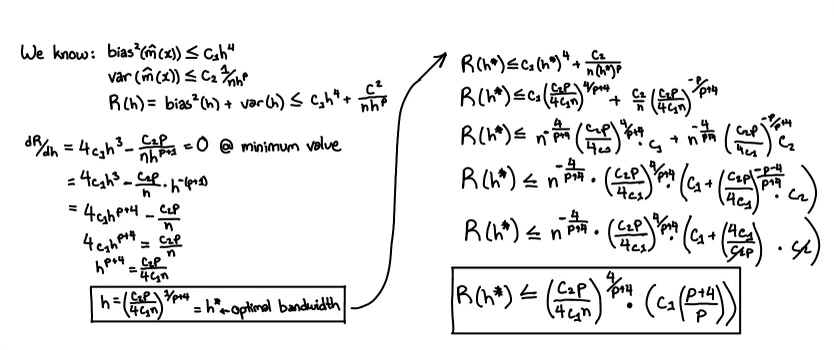

In [18]:
#Question 2.1
from IPython.display import Image
Image(filename="/Users/ananya_krishna/Desktop/math1.jpeg")

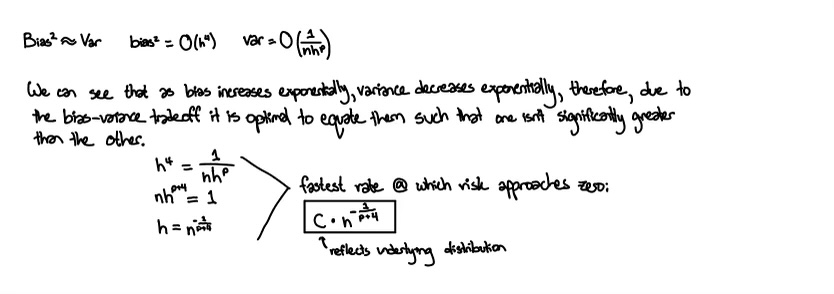

In [19]:
#Question 2.2
from IPython.display import Image
Image(filename="/Users/ananya_krishna/Desktop/math2.jpeg")

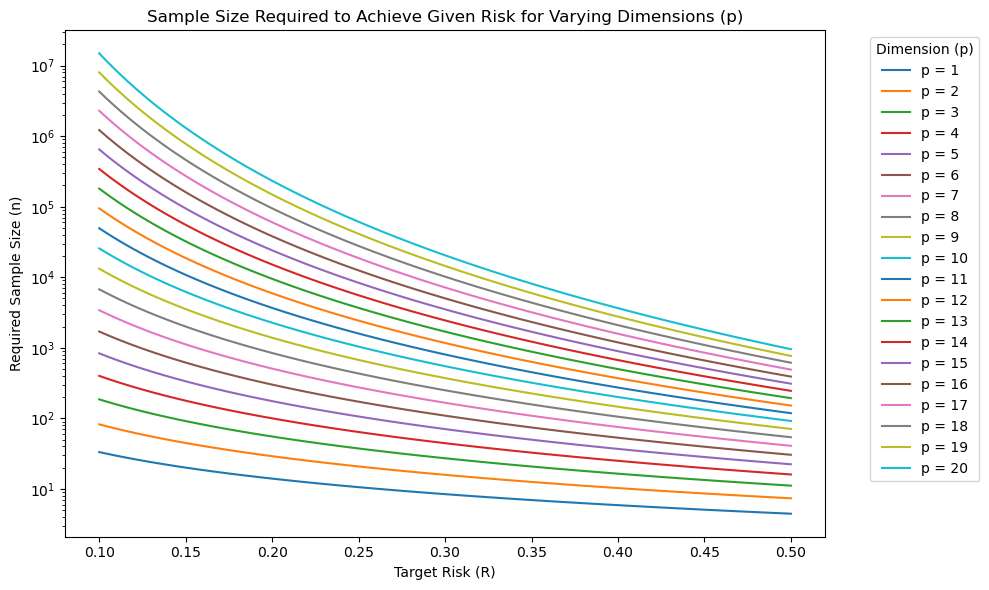

In [82]:
#Question 2.3

import numpy as np
import matplotlib.pyplot as plt

c1 = 1
c2 = 1

R_values = np.linspace(0.1, 0.5, 100)
p_values = np.arange(1, 21)

plt.figure(figsize=(10, 6))
plt.yscale('log')

for p in p_values:
    n_values = (c2 * p / (4 * c1)) * ((c1 * (p + 4)) / (p * R_values))**((p + 4) / 4)
    plt.plot(R_values, n_values, label=f'p = {p}')

plt.xlabel('Target Risk (R)')
plt.ylabel('Required Sample Size (n)')
plt.title('Sample Size Required to Achieve Given Risk for Varying Dimensions (p)')
plt.legend(title='Dimension (p)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### Problem 3: A kernel of truth (15 points)

For problem you will implement nonparametric regression using Mercer kernels and penalization, in 1-dimension. This can be compared to regression using smoothing kernels. 

As discussed in lecture, nonparametric regression with Mercer kernels is based on the infinite dimensional ridge regression

$$ \hat m = \mbox{argmin} \| Y - m \|^2 + \lambda \|m\|_K^2$$

By the representer theorem, this is equivalent to setting $\hat m(x) = \sum_{i=1}^n \hat \alpha_i K(X_i, x)$ and 
using the finite dimensional optimization

$$ \hat \alpha = \mbox{argmin} \| Y - {\mathbb K} \alpha \|^2 + \lambda \alpha^T {\mathbb K} \alpha$$

###  3.1 Solve 

Derive a closed-form expression for the minimizer $\hat\alpha$. Show all of the steps in your derivation, 
and justify each step. (As above, you may either enter your answers in Markdown using $\rm\LaTeX$, or insert an image of your handwritten solution.)


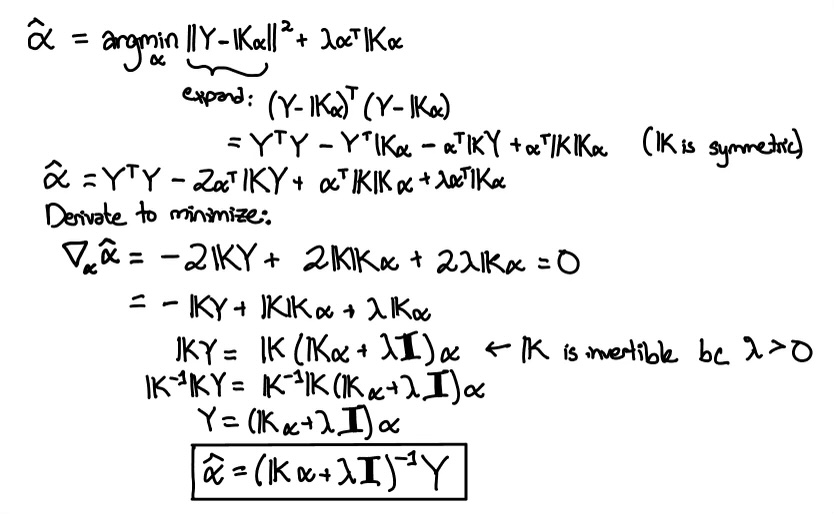

In [22]:
from IPython.display import Image
Image(filename="/Users/ananya_krishna/Desktop/math3.jpeg")

###  3.2 Implement

Next you will use your solution above and implement Mercer kernel regression. We give some starter code.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
from time import sleep

The following cell defines some "helper functions" for this exercise. You don't need to change any of this code.
(If you do want to make changes, just describe what you did and why.)

In [24]:
def plot_estimate(x, f, fhat, X, y, sigma, lmbda, sleeptime=.01):
    clear_output(wait=True)
    plt.figure(figsize=(10,6))
    plt.plot(x, f, color='red', linewidth=2, label='true function')
    plt.plot(x, fhat, color='blue', linewidth=2, label='estimated function')
    plt.scatter(X, y, color='black', alpha=.5, label='random sample')
    plt.ylim(np.min(f)-4*sigma, np.max(f)+4*sigma)
    plt.legend(loc='upper left')
    plt.title('lambda: %.3g' % lmbda)
    plt.xlabel('x')
    plt.ylabel('estimated m(x)')
    plt.show()
    sleep(sleeptime)
    
def true_fn(x):
    return 3*x**2

def run_simulation(kernel, lmbdas, show_bias_variance=True):
    min_x, max_x = -1, 1
    x = np.linspace(min_x, max_x, 100)
    f = true_fn(x)
    sigma = .25
    estimates = []
    trials = 500

    for lmbda in lmbdas:
        estimates_lambda = []
        for i in np.arange(trials):
            X = np.sort(np.random.uniform(low=min_x, high=max_x, size=50))
            fX = true_fn(X)
            y = fX + sigma*np.random.normal(size=len(X))
            fhat = mercer_kernel_regress(kernel, X, y, x, lmbda=lmbda)
            if i % 50 == 0:
                plot_estimate(x, f, fhat, X, y, sigma, lmbda)
            estimates_lambda.append(fhat)
        estimates.append(estimates_lambda)

    if show_bias_variance == False:
        return
    
    fhat = np.array(estimates)
    sq_bias = np.zeros(len(lmbdas))
    variance = np.zeros(len(lmbdas))

    for i in np.arange(len(lmbdas)):
        sq_bias[i] = np.mean((np.mean(fhat[i], axis=0) - f)**2)
        variance[i] = np.mean(np.var(fhat[i], axis=0))
    
    plt.figure(figsize=(10,6))
    plt.plot(lmbdas, sq_bias, label='squared bias', linewidth=2)
    plt.plot(lmbdas, variance, label='variance', linewidth=2)
    plt.plot(lmbdas, sq_bias + variance, label='risk')
    plt.legend()
    plt.show()
 

Your job is to implement Mercer kernel regression and run it on two 
different kernel functions. The two kernels could simply be the Gaussian kernel
with two different bandwidths, or you might experiment with other kernels.

The function `mercer_kernel_regress` takes a kernel, training data `X` and `y`, an array of values `x` to evaluate the function on, and a regularization parameter. You'll use your derivation above to 
determine the coefficients $\alpha$. For some clues and suggestions on how to do the 
implementation, see our demo code for smoothing kernels. You need to do something very similar.


In [69]:
def mercer_kernel_regress(kernel, X, y, x, lmbda):  
    # your implementation here
    n = len(X)
    K = np.zeros((n, n))
    
    for i in range(n):
        K[i] = kernel(X[i], X)
        
    K_reg = K + lmbda * np.eye(n)
    alpha = np.linalg.solve(K_reg, y)
    K_Xx = np.zeros((n, len(x)))
    
    for i in range(n):
        K_Xx[i] = kernel(X[i], x)
        
    fhat = np.dot(K_Xx.T, alpha)
    return fhat

def kernel1(x,y):
    # triangular kernel
    h = 0.6
    u = x - y
    return (1-np.abs(u)/h)*np.array(np.fabs(u)/h < 1)
    
def kernel2(x,y):
    # gaussian kernel
    h = 0.12
    u = x - y
    return np.exp(-(u)**2/(2*h**2))

###  3.3 Run two simulations and select regularization parameters

Finally, using our starter code and your own implementation above, run two simulations, one 
using `kernel1` and the other using `kernel2`. After each simulation, select a regularization level from the bias-variance tradeoff, and then run a final simulation with that regularization level. In the following 
starter code, you only need to specify the sequence of regularization parameters.


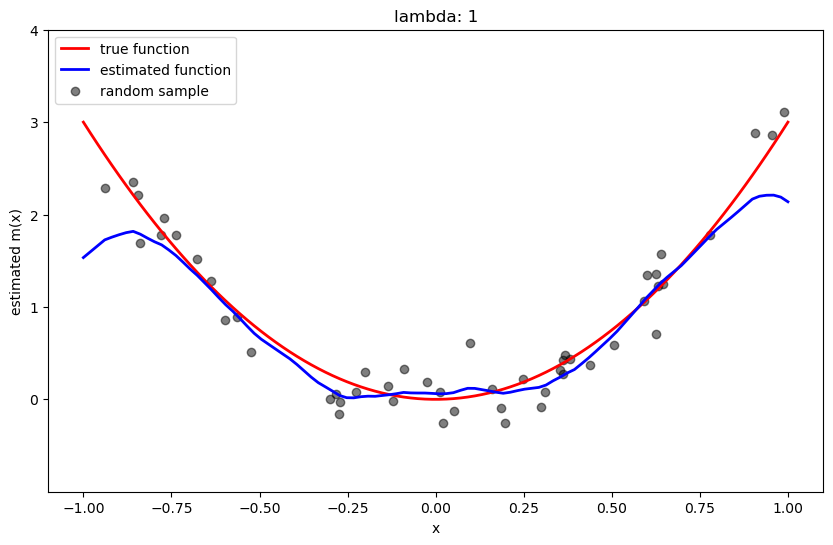

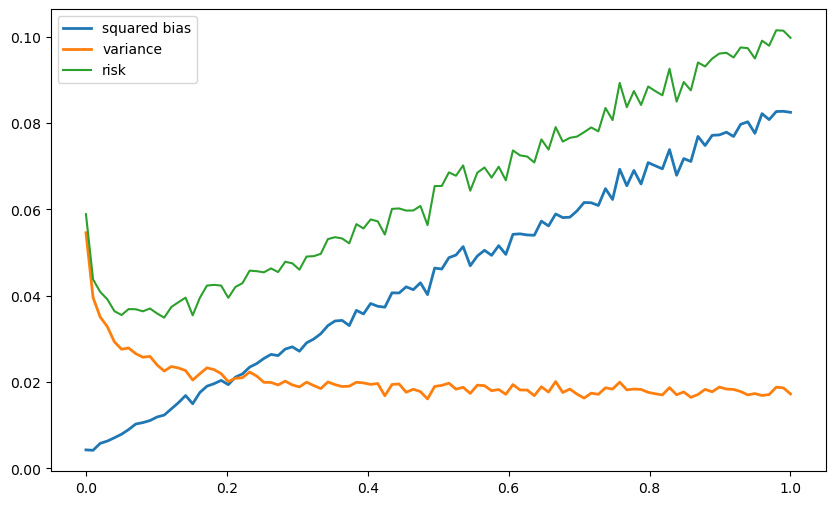

In [47]:
lmbdas = np.linspace(0, 1, 100) #define your lambdas here
run_simulation(kernel1, lmbdas) 

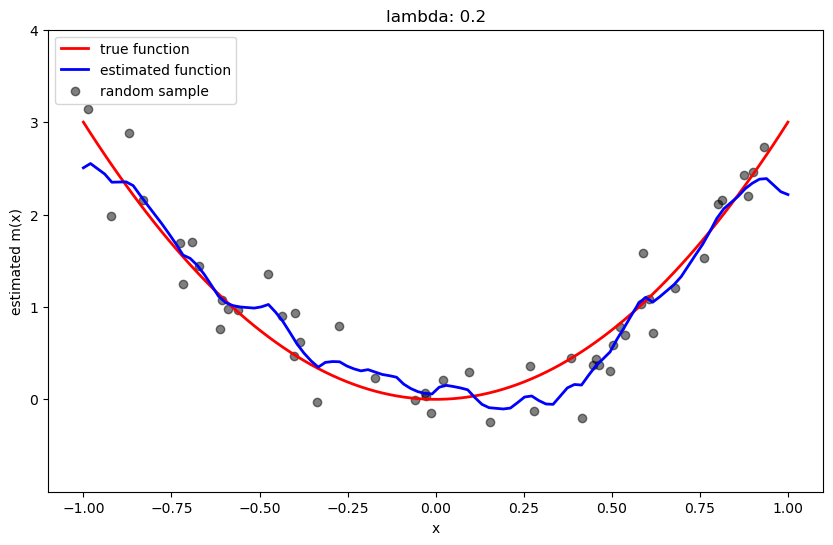

In [71]:
lambda_hat = 0.2
run_simulation(kernel1, [lambda_hat], show_bias_variance=False)

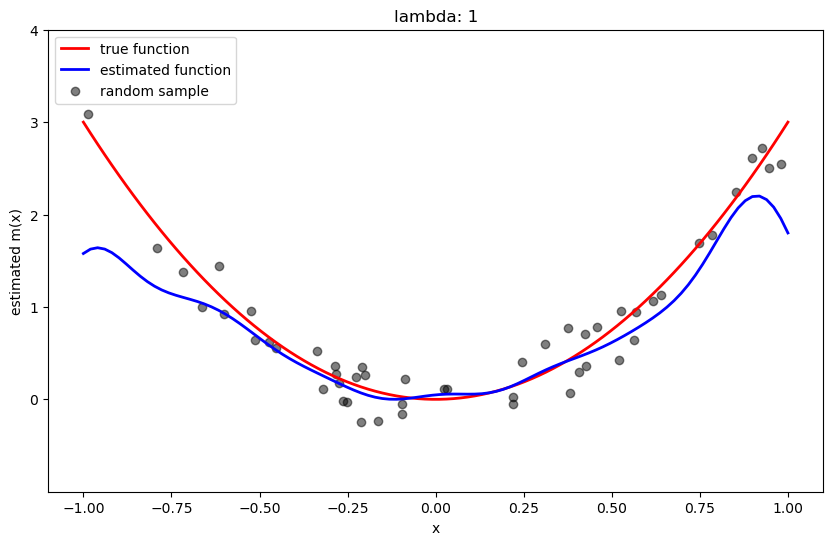

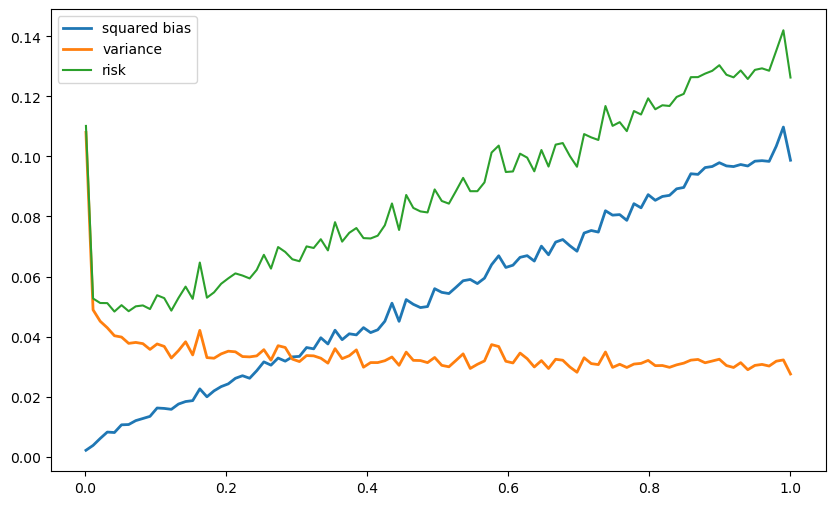

In [70]:
lmbdas = np.linspace(0.001, 1, 100)
run_simulation(kernel2, lmbdas)

### Problem 4: An algebraic simplification of LOOCV (15 points)

Leave-One-Out Cross Validation (LOOCV) is a specific type of 
$K$-fold cross validation where $K$ equals the number of observations in the dataset. 
It works as follows for a training set with $n$ observations:

1. A single observation is used as the validation set, 
    and the remaining $n-1$ observations serve as the training set.
2. A model is trained on the $n-1$ observations and 
    validated on the single left-out observation.
3. This process is repeated $n$ times, each time leaving out a different 
    observation as the validation set.
4. The LOOCV error is then the average error across all $n$ trials.

LOOCV is particularly useful because:
- It utilizes almost all the data for training, 
    so it's less prone to high variance compared to other validation schemes.
- Since each observation is tested exactly once, 
    LOOCV provides a very thorough out-of-sample testing mechanism.

However, it can be computationally expensive because you have to fit the model $n$ times. 
    Luckily, for some models, there are algebraic simplifications available 
    that make it computationally efficient.
    Expressing LOOCV in terms of the hat matrix allows for efficient 
    computation of the LOOCV error without the need to refit the model for 
    each left-out observation, making it a valuable tool for model evaluation.

Recall that the LOOCV error can be expressed as:

$$ LOOCV = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_{-i} \right)^2, $$

where $\hat{y}_{-i}$ represents the prediction for the $i^{th}$ observation 
when it's left out from the training process.
In the following questions, you will be deriving an alternative expression 
of the LOOCV error for both kernel and ridge regression, following the hints below.

### 1. LOOCV for kernel smoothing:

For kernels, we know that the LOOCV error can be equivalently written as the following form:

$$ LOOCV = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{y_i - \hat y_i}{1 - L_{ii}} \right)^2, $$
where $\hat y_i$ is the predicted value from the model fit on all data, and 
$L_{ii}$ is the $i^{th}$ diagonal element of the hat matrix $L$.

For kernel regression, we have
$$ \hat{y} = L y, $$
where
- $ \hat{y} $ is the vector of predictions.
- $ y $ is the observed response values.
- $ L $ is the hat matrix and is defined by the kernel (for a given bandwidth).
So, each diagonal element $ L_{ii} $ of the matrix $ L $ is defined as:
$$ L_{ii} = \frac{K\left(x_i, x_i\right)}{\sum_{j=1}^{n} K\left(x_i, x_j\right)}, $$
where
- $ K $ is the kernel function.
- $ x_i $ and $ x_j $ are the predictor values for observations $ i $ and $ j $, respectively.

The diagonal elements $ L_{ii} $ give the "leverage" of each observation, which can be interpreted as the influence an observation has on its own prediction. 

Derive this alternative expression of the LOOCV error for kernel regression. That's to say, for kernel regression, prove that

$$ y_i - \hat{y}_{-i}  =  \frac{y_i - \hat y_i}{1 - L_{ii}}$$

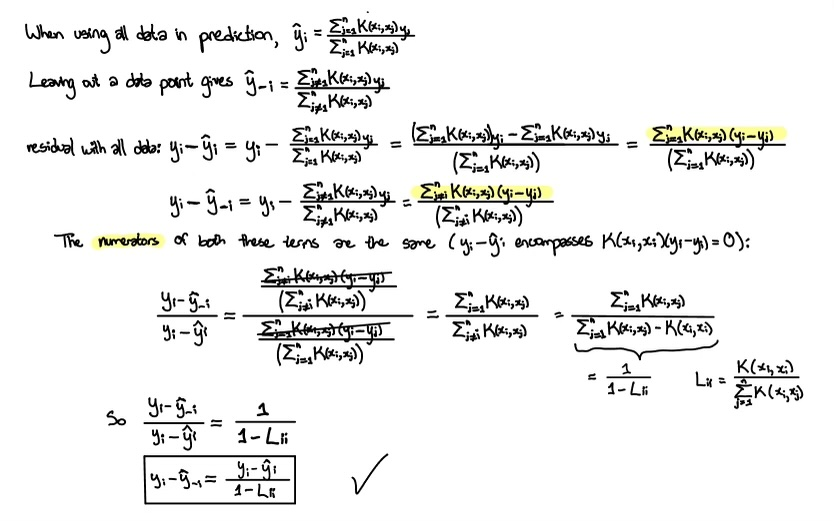

In [73]:
from IPython.display import Image
Image(filename="/Users/ananya_krishna/Desktop/math4.jpeg")

### 2. LOOCV for ridge regression:

Recall that for ridge regression, the prediction equation can be written as:

$$ \hat{y} = X(X^T X + \lambda I)^{-1}X^T y, $$

where:
- $X$ is the design matrix, and each row $x_i$ represents the $i^{th}$ observation, such that $X=\left[\begin{array}{c}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{array}\right]$
- $y$ is the response vector.
- $\lambda$ is the ridge parameter.
- $I$ is an identity matrix.

As in the kernel smoothing case, the LOOCV can be written as:
$$ LOOCV = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{y_i-\hat y_i}{1 - H_{ii}} \right)^2, $$
where the hat matrix is

$$ H = X(X^T X + \lambda I)^{-1} X^T $$

In the following steps, we will derive this alternative expression of the LOOCV error for ridge regression.


2.1 Using the [Sherman-Morrison
formula](https://en.wikipedia.org/wiki/Sherman%E2%80%93Morrison_formula), a special case of the [Woodbury matrix identity](https://en.wikipedia.org/wiki/Woodbury_matrix_identity):
$$
(A - uv^T)^{-1} = A^{-1} + \frac{A^{-1}uv^T A^{-1}}{1 - v^T A^{-1}u}.
$$

The design matrix when we leave out the $i^{th}$ observation is denoted as $X_{-i}$. Prove that 

$$ (X_{-i}^T X_{-i} + \lambda I)^{-1} = (X^T X + \lambda I)^{-1} + \frac{(X^T X + \lambda I)^{-1}x_i x_i^T (X^T X + \lambda I)^{-1}}{1 - x_i^T (X^T X + \lambda I)^{-1}x_i} $$

Hint: What's the relationship between $X_{-i}^T X_{-i}$ and $X^T X $?

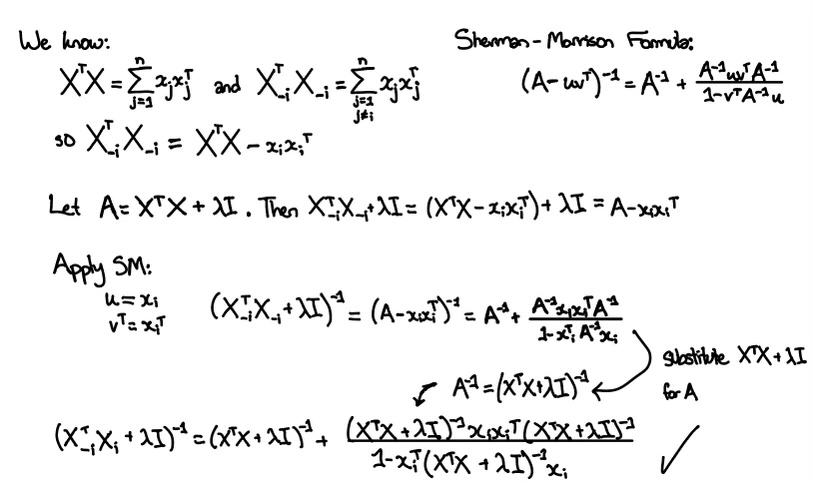

In [76]:
from IPython.display import Image
Image(filename="/Users/ananya_krishna/Desktop/math5.jpeg")

2.2  Let $A = X^T X + \lambda I$. Using previous formulas,  prove that $\hat{\beta}_{-i}$, which is derived from $ \hat{y}_{-i} = x_i^T \hat{\beta}_{-i} $, can be expressed as:

\begin{align*}
    \hat{\beta}_{-i} & = A^{-1} X^T y-A^{-1} x_i y_i+\frac{A^{-1} x_i x_i^T A^{-1}}{1 - x_i^T A^{-1}x_i}\left(X^T y-x_i y_i\right)
\end{align*}


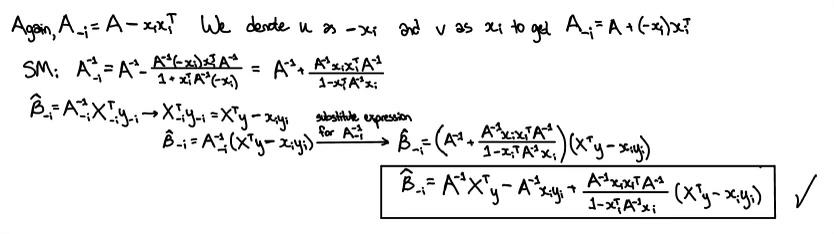

In [77]:
from IPython.display import Image
Image(filename="/Users/ananya_krishna/Desktop/math6.jpeg")

2.3 Note that the $i^{th}$ diagnoal element of $H$ satifies $H_{ii} = x_i^T A^{-1}x_i $.  Using previous formulas, prove that 


$$  \hat{\beta}_{-i} - \hat{\beta}  = \frac{A^{-1} x_i \left( \hat{y}_i - y_i\right)}{1 - H_{ii}}$$
Hint : What is $ A^{-1} X^T y$?



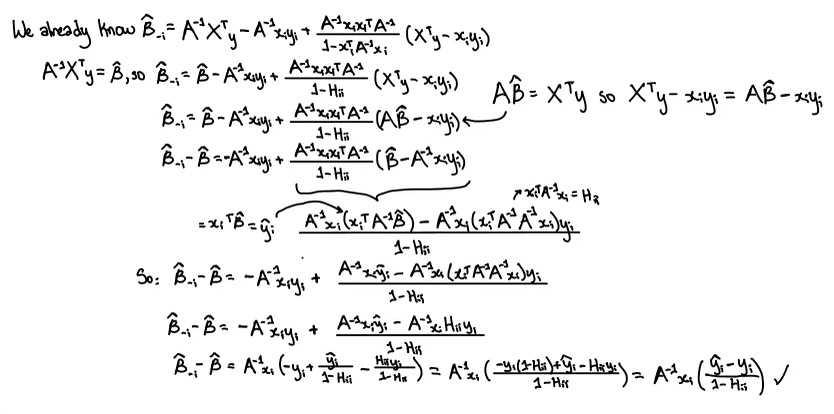

In [78]:
from IPython.display import Image
Image(filename="/Users/ananya_krishna/Desktop/math7.jpeg")

2.4 Finally, using previous formulas, prove that in the kernel smoothing case, the LOOCV can be written as:
$$ LOOCV = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{y_i-\hat y_i}{1 - H_{ii}} \right)^2 $$
That's to say, prove that

$$ y_i - \hat{y}_{-i} = \frac{y_i-\hat y_i}{1 - H_{ii}} $$

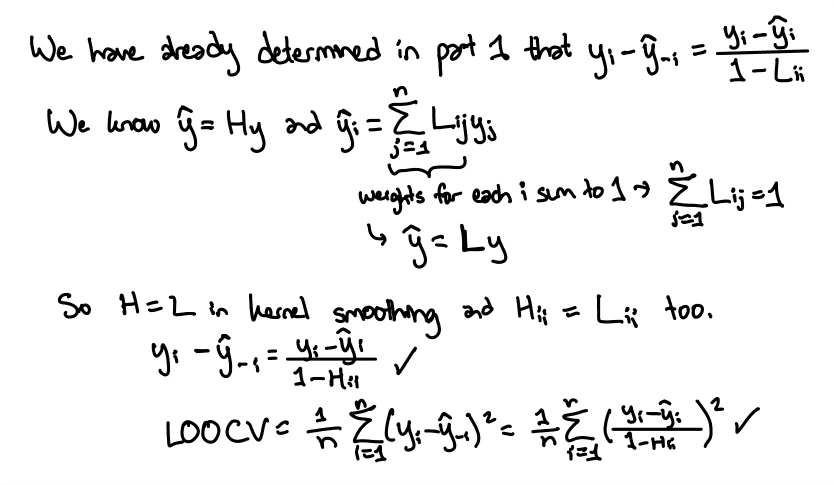

In [79]:
from IPython.display import Image
Image(filename="/Users/ananya_krishna/Desktop/math8.jpeg")